In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances

In [98]:
x_1 = [1,3,7,6,5,13,10,15,20,54]
x_2 = [10,15,24,12,23,78,90,56,12,10]
y = [1,1,1,1,1,-1,-1,-1,-1,-1]

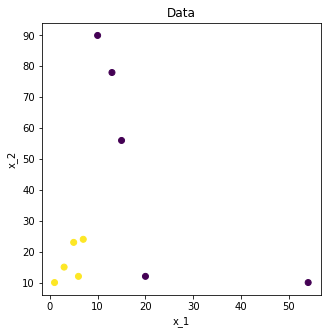

In [93]:
fig, ax = plt.subplots()

ax.scatter(x_1, x_2, c=y)
ax.set_title('Data')
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")

fig.set_figwidth(5)
fig.set_figheight(5)  

plt.show()

In [94]:
x_1 = np.asarray(x_1)
x_2 = np.asarray(x_2)
X = np.stack((x_1,x_2),axis=1)
y = np.asarray(y)

In [95]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1,1]]))

[1]


In [96]:
class KNN:
    def __init__(self, n_neighbors, my_type):
        self.neighbors = n_neighbors
        self.type = my_type
        
    def fit(self,x,y):
        self.x=np.asarray(x)
        self.y=np.asarray(y)

    def predict(self,sample):
        dist = euclidean_distances(sample, self.x)
        arguments = np.argsort(dist, axis=1)[0][:self.neighbors]
        if self.type == 'regression':
            return np.mean(self.y[arguments])
        elif self.type == 'classifier':
            unique, counts = np.unique(self.y[arguments], return_counts=True)
            return unique[np.argmax(counts)]

In [97]:
my_neigh = KNN(3, 'classifier')
my_neigh.fit(X, y)
print(my_neigh.predict([[1,1]]))

1
